# ПР2
## Гладышкевич Игорь, ММР214

#### Информация о датасете


**Описание:** Датасет представляет собой базу данных опроса о Customer experience покупателей платформы Joom. Клиенты получают опрос на e-mail через сутки после получения заказа. Опрос необходим для динамического мониторинга за удовлетворенностью и лояльностью клиентов и для оценивания драйверов и барьеров использования платформы.

**ДИСКЛЕЙМЕР: к сожалению, я не могу выложить данные на GitHub, потому что это довольно конфиденциальные данные. Если они понадобятся для проверки работы, пожалуйста, напишите на ipgladyshkevich@edu.hse.ru или в Telegram: @Igor_Gladyshkevich.**

**Список переменных**:
* resp_id: уникальный номер анкеты из платформы анкетирования
* country: страна юзера
* _imp: переменные, показывающие значимость соответствующего фактора для юзера - от 0 до 10, где 10 - очень важно
* _sat: переменные, показывающие удовлетворенность соответствующим фактором для юзера - от 0 до 10, где 10 - очень удовлетворен
* NPS: метрика лояльности NPS, измеряется от 0 до 10, насколько юзер готов рекомендовать платформу
* _aff: бинарные переменные, показывающие повлиял ли соответствующий фактор на готовность рекомендовать платформу, где 1 - повлиял, 0 - не повлиял
* order_size: размер заказа по стоимости, где 1 - малый, 2 - средний, 3 - большой, 4 - очень большой
* month: номер календарного месяца прохождения анкеты

**Основная цель исследования: определить динамику по основным метрикам, определить осознаваемые влияющие на эти метрики факторы, изучить реальное влияние факторов на метрики (через регрессии), определить основные зоны развития для бизнеса**

**Для начала загрузим и изучим датасет**

In [266]:
import pandas as pd

df = pd.read_csv('C:/Users/gladyshkevich_joom/Downloads/final.csv', sep=';')
print(df.shape)
df.head()

(33489, 41)


,Resp_id,country,Usability_interface_imp,Search_convenience_imp,Product_range_imp,Product_quality_imp,Prices_imp,Customer_support_imp,Delivery_convenience_imp,Delivery_speed_imp,Delivery_cost_imp,Payment_range_options_imp,Return_refund_policies_imp,Usability_interface_sat,Search_convenience_sat,Product_range_sat,Product_quality_sat,Prices_sat,Customer_support_sat,Delivery_convenience_sat,Delivery_speed_sat,Delivery_cost_sat,Payment_range_options_sat,Return_refund_policies_sat,Tracking_sat,Pickup_sat,Packaging_sat,NPS,Usability_interface_aff,Search_convenience_aff,Product_range_aff,Product_quality_aff,Prices_aff,Customer_support_aff,Delivery_convenience_aff,Delivery_speed_aff,Delivery_cost_aff,Payment_range_options_aff,Return_refund_policies_aff,order_size,month
0,10,France,2,4,7,7,6,5,7,2,3,8,10,3,4,5,8,6,6,7,9,9,7,8,6,7,8,4,0,1,1,1,1,0,0,0,0,0,0,3,6
1,11,Russian Federation,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,5,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1,1,1,2,6
2,12,Germany,8,8,8,9,9,8,8,8,8,8,8,8,8,7,2,7,6,5,2,5,6,4,5,5,6,7,1,0,0,0,0,0,0,0,0,0,0,3,6
3,13,Russian Federation,0,0,0,7,6,0,5,0,0,0,0,0,0,0,8,8,0,8,0,0,0,0,7,7,7,10,0,0,0,1,1,0,1,0,0,0,0,1,6
4,14,Russian Federation,10,10,10,10,10,10,10,10,10,10,10,10,5,5,3,5,0,10,3,0,10,0,5,5,5,8,0,0,0,1,1,0,0,0,0,0,0,1,6


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33489 entries, 0 to 33488
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Resp_id                     33489 non-null  int64 
 1   country                     33489 non-null  object
 2   Usability_interface_imp     33489 non-null  int64 
 3   Search_convenience_imp      33489 non-null  int64 
 4   Product_range_imp           33489 non-null  int64 
 5   Product_quality_imp         33489 non-null  int64 
 6   Prices_imp                  33489 non-null  int64 
 7   Customer_support_imp        33489 non-null  int64 
 8   Delivery_convenience_imp    33489 non-null  int64 
 9   Delivery_speed_imp          33489 non-null  int64 
 10  Delivery_cost_imp           33489 non-null  int64 
 11  Payment_range_options_imp   33489 non-null  int64 
 12  Return_refund_policies_imp  33489 non-null  int64 
 13  Usability_interface_sat     33489 non-null  in

**Видим все переменные, пропусков в данных нет, все переменные имеют необходимые для анализа форматы. Однако, для логичности, нужно перекодировать order_size в категорийную переменную, так как в процессе анализа это будет более удобно (не нужно вспоминать какая цифра за что отвечает). Кроме того, удалим переменную с уникальным номером анкеты, так как это нам не нужно для анализа**

**Еще важно отметить, что в этом датасете нет выбросов - все шкалы фиксированные, и мы не можем выкинуть какие-либо наблюдения, так как они олицетворяют оценку потребителя**

In [268]:
def get_size(size): ##задаем функцию
    if size == 1:
        return 'Small'
    elif size == 2:
        return 'Medium'
    elif size == 3:
        return 'Big'
    elif size == 4:
        return 'Extra'
df['order_size_c'] = df['order_size'].apply(get_size)

In [269]:
df=df.drop(['order_size', 'Resp_id'], axis='columns')

**Посмотрим как выглядит случайное наблюдение, чтобы представлять анкету юзера**

In [270]:
df.iloc[345] ## случайное наблюдение

country                       Germany
Usability_interface_imp            10
Search_convenience_imp             10
Product_range_imp                  10
Product_quality_imp                10
Prices_imp                         10
Customer_support_imp               10
Delivery_convenience_imp            4
Delivery_speed_imp                 10
Delivery_cost_imp                  10
Payment_range_options_imp           7
Return_refund_policies_imp          1
Usability_interface_sat             9
Search_convenience_sat              9
Product_range_sat                  10
Product_quality_sat                10
Prices_sat                         10
Customer_support_sat               10
Delivery_convenience_sat            7
Delivery_speed_sat                  5
Delivery_cost_sat                  10
Payment_range_options_sat          10
Return_refund_policies_sat         10
Tracking_sat                        7
Pickup_sat                          7
Packaging_sat                       0
NPS         

**Итак, начнем с проверки распределения наблюдений по категорийным переменным - страна, месяц и размер заказа. Так мы сразу поймем равнонаполенные они или нет и нужно ли что-то делать с этим.**

In [271]:
df['month'].value_counts()

8     9981
7     9441
9     7722
6     5277
10    1068
Name: month, dtype: int64

In [272]:
df['order_size_c'].value_counts()

Medium    10449
Big        8485
Small      8178
Extra      6377
Name: order_size_c, dtype: int64

In [273]:
df['country'].value_counts()

Russian Federation    25014
Germany                4611
France                 2818
Kazakhstan             1046
Name: country, dtype: int64

**В целом, по размеру заказа достаточно наблюдений в каждой группе. Все месяцы тоже имеют достаточное количество наблюдений. Есть небольшая проблема с октябрем - там меньше наблюдений, однако их все еще достаточно для анализа в рамках этой ПР. То же самое по странам - есть перекос в сторону России, это нужно будет учитывать и в некоторых видах анализа рассматривать их по отдельности.**

**Итак, основная метрик в данном датасете - это NPS. Она позволяет определить является ли юзер промоутером (поставил 10-9), нейтралом (8-7) и детрактором (0-6). Давайте закодируем юзеров по этому правилу.**

In [274]:
def nps_cat(NPS): ##задаем функцию
    if NPS <= 6:
        return 'Detractor'
    elif (NPS >6) and (NPS <= 8):
        return 'Neutral'
    else:
        return 'Promoter'
df['nps_cat'] = df['NPS'].apply(nps_cat)

Text(0.5, 0.98, 'Распределение категорий NPS по месяцам')

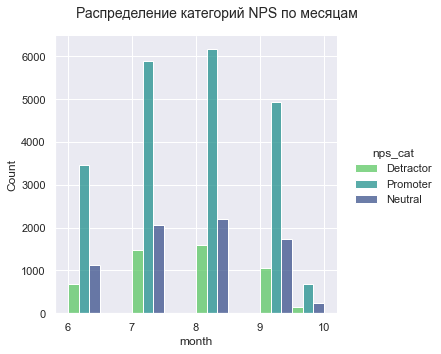

In [275]:
import seaborn as sns #визуализируем данные
sns.set(font = 'Arial')
ax=sns.displot(data=df, x='month', hue='nps_cat', palette="viridis_r", common_norm=False, multiple="dodge", binwidth=0.5) 
ax.fig.subplots_adjust (top= .9 ) #двигаем название выше
ax.fig.suptitle("Распределение категорий NPS по месяцам",
                  fontsize=14, fontdict={"weight": "bold"})

Text(0.5, 0.98, 'Распределение категорий NPS по странам')

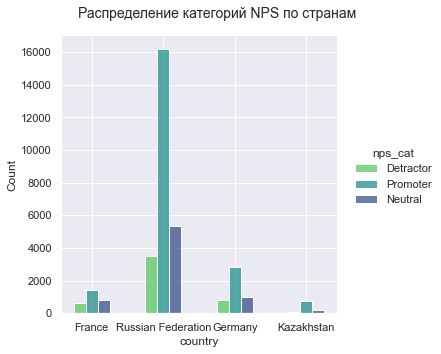

In [276]:
sns.set(font = 'Arial')
ax=sns.displot(data=df, x='country', hue='nps_cat', palette="viridis_r", common_norm=False, multiple="dodge", 
              shrink=0.5) 
ax.fig.subplots_adjust (top= .9 ) #двигаем название выше
ax.fig.suptitle("Распределение категорий NPS по странам",
                  fontsize=14, fontdict={"weight": "bold"})

Text(0.5, 0.98, 'Распределение категорий NPS по размерам заказа')

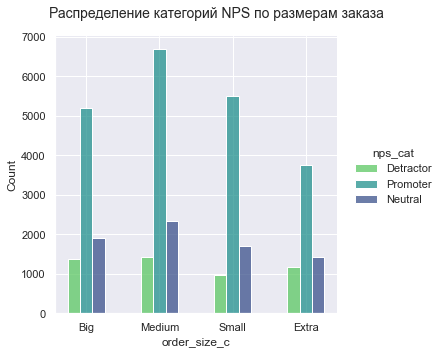

In [277]:
sns.set(font = 'Arial')
ax=sns.displot(data=df, x='order_size_c', hue='nps_cat', palette="viridis_r", common_norm=False, multiple="dodge", 
              shrink=0.5) 
ax.fig.subplots_adjust (top= .9 ) #двигаем название выше
ax.fig.suptitle("Распределение категорий NPS по размерам заказа",
                  fontsize=14, fontdict={"weight": "bold"})

**Уже сейчас, мы видим, что во всех распределениях число промоутеров больше числа детракторов. Согласно метрике NPS это говорит нам о ее положительном значении - бренд находится в зоне положительной лояльности. Давайте посчитаем NPS для разных месяцев и стран и посмотрим есть ли какие-либо значимые различия**

In [278]:
nps_df = df.groupby(['country', 'month'])['nps_cat'].apply(lambda x: (x.str.contains('Promoter').sum() - x.str.contains('Detractor').sum()) / (x.str.contains('Promoter').sum() + x.str.contains('Neutral').sum() + x.str.contains('Detractor').sum())*100).reset_index()
nps_df=nps_df.rename(columns={"nps_cat": "nps"})
#создаем табличку с НПС, применяем функцию, которая вычисляет индекс

In [279]:
sample = df.groupby(['country', 'month'])['nps_cat'].apply(lambda x: (x.str.contains('Promoter').sum()+x.str.contains('Neutral').sum()+x.str.contains('Detractor').sum())).reset_index()
nps_df=nps_df.join(sample['nps_cat'])
nps_df=nps_df.rename(columns={"nps_cat": "sample"})
nps_df
#добавляем в табличку размер выборки

,country,month,nps,sample
0,France,6,31.910946,539
1,France,7,25.806452,651
2,France,8,26.838235,816
3,France,9,32.300885,678
4,France,10,36.567164,134
5,Germany,6,49.013158,912
6,Germany,7,43.448276,1160
7,Germany,8,42.327650,1349
8,Germany,9,41.569767,1032
9,Germany,10,38.607595,158


In [280]:
nps_RU=nps_df.loc[nps_df['country'] == 'Russian Federation']
nps_KZ=nps_df.loc[nps_df['country'] == 'Kazakhstan']
nps_FR=nps_df.loc[nps_df['country'] == 'France']
nps_DE=nps_df.loc[nps_df['country'] == 'Germany']


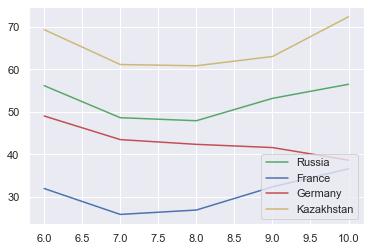

In [281]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = nps_RU['month']
y1 = nps_RU['nps']
y2 = nps_FR['nps']
y3 = nps_DE['nps']
y4 = nps_KZ['nps']


ax.plot(x, y1, 'g-')
ax.plot(x, y2, 'b-')
ax.plot(x, y3, 'r-')
ax.plot(x, y4, 'y-')
ax.legend(['Russia', 'France', 'Germany', 'Kazakhstan'], loc=4)



**Итак, мы уже видим, что во Франции самая низкая удовлетворенность пользователей. В Казахстане - наивысшая. Видна просадка в динамике лояльности в июле и августе и ее восстановление к осени во всех странах, кроме Германии. В Германии NPS стагнирует.**

**Важно отметить, что считать статистические значимости различий в индексе НПС мы не можем - это составной индекс, поэтому подсчет доверительных интевалов в данном случае - кропотливый и не очень эффективный процесс. Поэтому здесь можно немного схитрить и посчитать через прокси метрику - мы можем взять среднюю оценку готовности к рекомендации по странам за сентябрь (так как октябрь в датасете - неполный месяц + нас интересует история после просадки) и посмотреть, есть ли значимости в средних по этой оценке между странами. Считать эту прокси метрику внутри страны по месяцам - немного бессмысленно с точки зрения бизнеса. Мы по индексу видим эту просадку, и этого достаточно, чтобы сделать выводы о проблемах в Июле и Августе.**

In [282]:
df1=df.loc[df['month'] == 9] #берем только сентябрь
mean_npsRU=df1.loc[df['country'] == 'Russian Federation']['NPS'].mean() #считаем средние
mean_npsKZ=df1.loc[df['country'] == 'Kazakhstan']['NPS'].mean()
mean_npsDE=df1.loc[df['country'] == 'Germany']['NPS'].mean()
mean_npsFR=df1.loc[df['country'] == 'France']['NPS'].mean()
base_npsRU=df1.loc[df['country'] == 'Russian Federation']['NPS'].count() #считаем средние
base_npsKZ=df1.loc[df['country'] == 'Kazakhstan']['NPS'].count()
base_npsDE=df1.loc[df['country'] == 'Germany']['NPS'].count()
base_npsFR=df1.loc[df['country'] == 'France']['NPS'].count()
std_npsRU=df1.loc[df['country'] == 'Russian Federation']['NPS'].std() #считаем ст.отклонение
std_npsKZ=df1.loc[df['country'] == 'Kazakhstan']['NPS'].std()
std_npsDE=df1.loc[df['country'] == 'Germany']['NPS'].std()
std_npsFR=df1.loc[df['country'] == 'France']['NPS'].std()

In [283]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667 #используем это значение, оно показывает значимость на 95% доверительном интервале, что в целом в компании считается подходящим интервалом для маркетинговых исследований

In [284]:
print ('Результаты Т-теста средней готовности к рекомендации между Россией и Францией')
print(ttest_ind_from_stats(mean1=mean_npsRU, std1=std_npsRU, nobs1=base_npsRU,
                     mean2=mean_npsFR, std2=std_npsFR, nobs2=base_npsFR))
p_value = ttest_ind_from_stats(mean1=mean_npsRU, std1=std_npsRU, nobs1=base_npsRU,
                     mean2=mean_npsFR, std2=std_npsFR, nobs2=base_npsFR)[-1]
hypothesis_check(p_value, t_critical)

Результаты Т-теста средней готовности к рекомендации между Россией и Францией
Ttest_indResult(statistic=8.87942090599614, pvalue=8.593316236030282e-19)
Отвергаем Н0. Разница между средними статистически значима.


In [285]:
print ('Результаты Т-теста средней готовности к рекомендации между Россией и Казахстаном')
print(ttest_ind_from_stats(mean1=mean_npsRU, std1=std_npsRU, nobs1=base_npsRU,
                     mean2=mean_npsKZ, std2=std_npsKZ, nobs2=base_npsKZ))
p_value = ttest_ind_from_stats(mean1=mean_npsRU, std1=std_npsRU, nobs1=base_npsRU,
                     mean2=mean_npsKZ, std2=std_npsKZ, nobs2=base_npsKZ)[-1]
hypothesis_check(p_value, t_critical)

Результаты Т-теста средней готовности к рекомендации между Россией и Казахстаном
Ttest_indResult(statistic=-2.5195405299433773, pvalue=0.011776527906971373)
Отвергаем Н0. Разница между средними статистически значима.


In [286]:

print ('Результаты Т-теста средней готовности к рекомендации между Францией и Германией')
print(ttest_ind_from_stats(mean1=mean_npsDE, std1=std_npsDE, nobs1=base_npsDE,
                     mean2=mean_npsFR, std2=std_npsFR, nobs2=base_npsFR))
p_value = ttest_ind_from_stats(mean1=mean_npsDE, std1=std_npsDE, nobs1=base_npsDE,
                     mean2=mean_npsFR, std2=std_npsFR, nobs2=base_npsFR)[-1]
hypothesis_check(p_value, t_critical)

Результаты Т-теста средней готовности к рекомендации между Францией и Германией
Ttest_indResult(statistic=2.5565374261240037, pvalue=0.01065779897633481)
Отвергаем Н0. Разница между средними статистически значима.


**Эти сравнения позволяют нам сделать вывод о том, что все различия статистически значимые. Это значит, что во Франции и Германии наименьшая лояльность потребителей. Принимая во внимание стагнацию лояльности в Германии, эти две страны должны попасть в фокус, с точки зрения бизнеса, продуктовых менеджеров для создания тактического плана по росту этой лояльности.**

**Перейдем к CSI. Давайте сначала в целом визуализируем среднюю удовлетворенность по параметрам, посмотрим на динамику**

In [287]:
sat = df.groupby(['country', 'month'])['Usability_interface_sat','Search_convenience_sat', 'Product_range_sat', 'Product_quality_sat',
                                     'Prices_sat', 'Customer_support_sat', 'Delivery_convenience_sat', 'Delivery_speed_sat',
                                      'Delivery_cost_sat', 'Payment_range_options_sat', 'Return_refund_policies_sat', 'Tracking_sat',
                                      'Pickup_sat', 'Packaging_sat'].mean().reset_index()
sat
##сделаем отдельный датасет со средними по удовлетворенности

C:\Users\gladyshkevich_joom\AppData\Local\Temp\ipykernel_19768\4102360116.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sat = df.groupby(['country', 'month'])['Usability_interface_sat','Search_convenience_sat', 'Product_range_sat', 'Product_quality_sat',


,country,month,Usability_interface_sat,Search_convenience_sat,Product_range_sat,Product_quality_sat,Prices_sat,Customer_support_sat,Delivery_convenience_sat,Delivery_speed_sat,Delivery_cost_sat,Payment_range_options_sat,Return_refund_policies_sat,Tracking_sat,Pickup_sat,Packaging_sat
0,France,6,7.395176,7.192950,6.781076,6.615955,7.031540,6.619666,6.424861,5.244898,6.391466,7.012987,6.235622,7.896104,7.844156,7.842301
1,France,7,7.135177,6.933948,6.723502,6.195084,6.998464,6.271889,6.296467,5.474654,6.470046,7.062980,5.863287,7.657450,7.625192,7.675883
2,France,8,7.167892,6.849265,6.839461,6.188725,6.699755,6.375000,6.254902,5.253676,6.361520,7.075980,5.805147,7.617647,7.649510,7.795343
3,France,9,8.001475,7.896755,7.635693,7.265487,7.797935,7.330383,7.336283,6.266962,7.253687,8.032448,6.971976,8.156342,8.112094,7.942478
4,France,10,8.216418,7.947761,7.649254,7.104478,7.604478,7.343284,7.522388,6.223881,7.432836,7.850746,7.395522,7.977612,8.238806,8.022388
5,Germany,6,7.821272,7.910088,7.982456,6.992325,7.800439,7.444079,7.695175,6.398026,7.706140,7.969298,6.942982,8.097588,8.297149,7.845395
6,Germany,7,7.711207,7.690517,7.814655,6.965517,7.637931,7.229310,7.580172,6.301724,7.606897,8.071552,6.786207,7.981897,8.182759,7.982759
7,Germany,8,7.457376,7.704225,7.853966,6.896961,7.657524,7.085990,7.469236,6.028910,7.501112,8.048925,6.667902,7.915493,7.928836,7.816160
8,Germany,9,8.416667,8.414729,8.493217,7.506783,8.290698,7.900194,8.272287,6.875000,8.297481,8.656977,7.538760,8.166667,8.372093,8.150194
9,Germany,10,8.544304,8.316456,8.493671,7.506329,8.227848,8.297468,8.265823,6.974684,8.189873,8.810127,7.664557,8.063291,8.044304,7.911392


In [288]:
list1 = ['Usability_interface_sat','Search_convenience_sat', 'Product_range_sat', 'Product_quality_sat',
                                     'Prices_sat', 'Customer_support_sat', 'Delivery_convenience_sat', 'Delivery_speed_sat',
                                      'Delivery_cost_sat', 'Payment_range_options_sat', 'Return_refund_policies_sat', 'Tracking_sat',
                                      'Pickup_sat', 'Packaging_sat']
##сделаем лист чтобы каждый раз не печатать название параметра

Text(0.5, 0.98, 'Satisfaction by parameters')

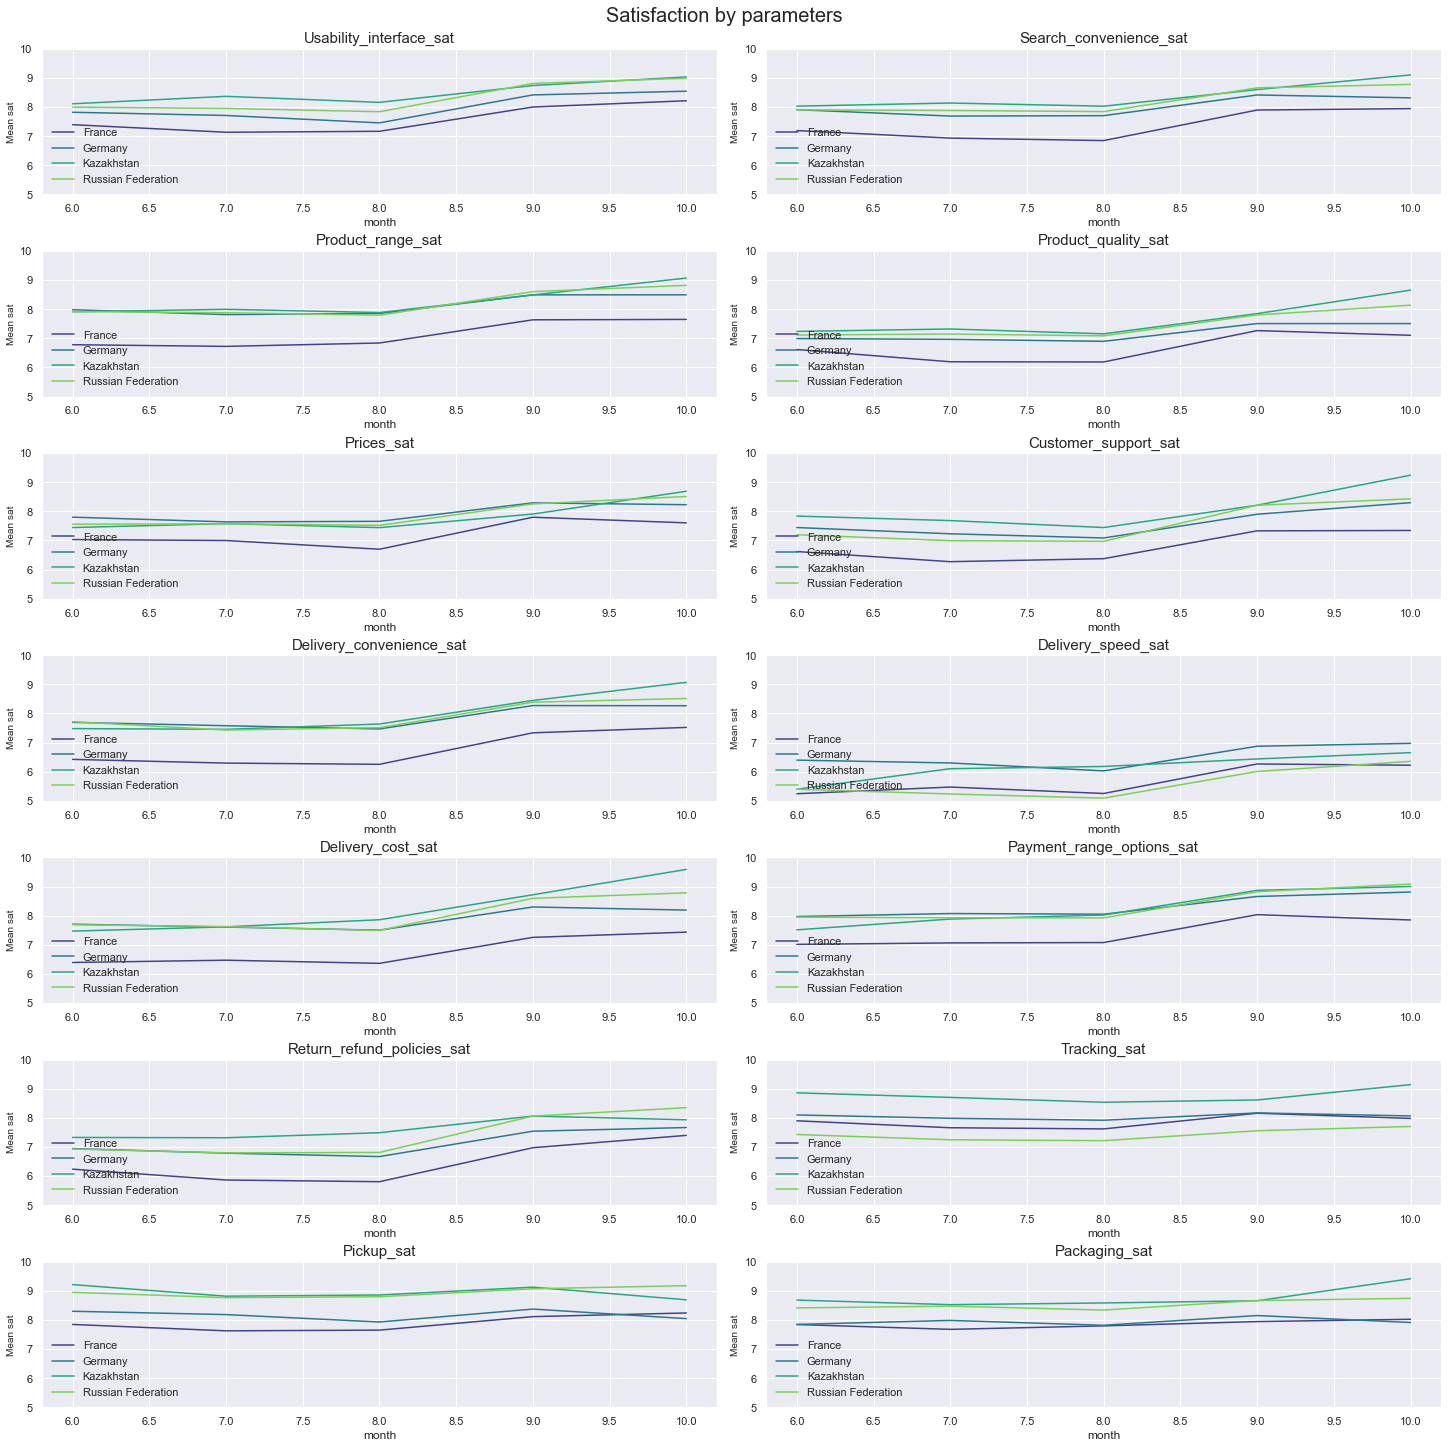

In [289]:
fig, axes = plt.subplots(7, 2, figsize=(20, 20), layout='constrained')
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", 4)

sns.lineplot(ax=axes[0, 0], data=sat, x="month", y=list1[0], hue="country", palette=palette)
sns.lineplot(ax=axes[0, 1], data=sat, x="month", y=list1[1], hue="country", palette=palette)
sns.lineplot(ax=axes[1, 0], data=sat, x="month", y=list1[2], hue="country", palette=palette)
sns.lineplot(ax=axes[1, 1], data=sat, x="month", y=list1[3], hue="country", palette=palette)
sns.lineplot(ax=axes[2, 0], data=sat, x="month", y=list1[4], hue="country", palette=palette)
sns.lineplot(ax=axes[2, 1], data=sat, x="month", y=list1[5], hue="country", palette=palette)
sns.lineplot(ax=axes[3, 0], data=sat, x="month", y=list1[6], hue="country", palette=palette)
sns.lineplot(ax=axes[3, 1], data=sat, x="month", y=list1[7], hue="country", palette=palette)
sns.lineplot(ax=axes[4, 0], data=sat, x="month", y=list1[8], hue="country", palette=palette)
sns.lineplot(ax=axes[4, 1], data=sat, x="month", y=list1[9], hue="country", palette=palette)
sns.lineplot(ax=axes[5, 0], data=sat, x="month", y=list1[10], hue="country", palette=palette)
sns.lineplot(ax=axes[5, 1], data=sat, x="month", y=list1[11], hue="country", palette=palette)
sns.lineplot(ax=axes[6, 0], data=sat, x="month", y=list1[12], hue="country", palette=palette)
sns.lineplot(ax=axes[6, 1], data=sat, x="month", y=list1[13], hue="country", palette=palette)


for axis,cat in zip(axes.ravel(), list1): #делаем подназвания
    axis.set_title(cat, fontsize=15)
    axis.set_ylabel('Mean sat', fontsize=10)
    axis.legend(frameon=False, loc=3)
    axis.set_ylim(5, 10)


        
fig.suptitle('Satisfaction by parameters', fontsize=20)

**Подобные дашборды используются внутри компании для динамического отслеживания удовлетворенности по параметрам. Отсюда можно сделать огромное количество выводов - например то, удовлетворенность скоростью доставки находится на низком уровене по сравнению с другими параметрами. С удовлетворенностью пикапом - в целом все хорошо. И так далее.** 

**Теперь давайте посчитаем сам CSI. Считать будем по следующей формуле: Сумма((Важность параметра (среднее)/Сумма важностей параметров)*удовлетворенность параметром)** 

In [290]:
#сначала возьмем только нужные нам данные
csi = df.groupby(['country', 'month'])['Usability_interface_imp','Search_convenience_imp', 'Product_range_imp', 'Product_quality_imp', 'Prices_imp', 'Customer_support_imp', 'Delivery_convenience_imp', 'Delivery_speed_imp', 'Delivery_cost_imp', 'Payment_range_options_imp', 'Return_refund_policies_imp',
                                       'Usability_interface_sat','Search_convenience_sat', 'Product_range_sat', 'Product_quality_sat',
                                     'Prices_sat', 'Customer_support_sat', 'Delivery_convenience_sat', 'Delivery_speed_sat',
                                      'Delivery_cost_sat', 'Payment_range_options_sat', 'Return_refund_policies_sat'].mean().reset_index()
csi

C:\Users\gladyshkevich_joom\AppData\Local\Temp\ipykernel_19768\1315042964.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  csi = df.groupby(['country', 'month'])['Usability_interface_imp','Search_convenience_imp', 'Product_range_imp', 'Product_quality_imp', 'Prices_imp', 'Customer_support_imp', 'Delivery_convenience_imp', 'Delivery_speed_imp', 'Delivery_cost_imp', 'Payment_range_options_imp', 'Return_refund_policies_imp',


,country,month,Usability_interface_imp,Search_convenience_imp,Product_range_imp,Product_quality_imp,Prices_imp,Customer_support_imp,Delivery_convenience_imp,Delivery_speed_imp,Delivery_cost_imp,Payment_range_options_imp,Return_refund_policies_imp,Usability_interface_sat,Search_convenience_sat,Product_range_sat,Product_quality_sat,Prices_sat,Customer_support_sat,Delivery_convenience_sat,Delivery_speed_sat,Delivery_cost_sat,Payment_range_options_sat,Return_refund_policies_sat
0,France,6,7.285714,7.205937,6.846011,7.031540,7.257885,6.981447,6.684601,5.708720,6.829314,6.790353,6.348794,7.395176,7.192950,6.781076,6.615955,7.031540,6.619666,6.424861,5.244898,6.391466,7.012987,6.235622
1,France,7,7.360983,7.165899,6.970814,7.026114,7.569892,6.807988,6.818740,6.116743,6.956989,7.198157,6.276498,7.135177,6.933948,6.723502,6.195084,6.998464,6.271889,6.296467,5.474654,6.470046,7.062980,5.863287
2,France,8,7.383578,7.212010,6.889706,7.061275,7.327206,6.821078,6.726716,5.930147,6.988971,7.050245,6.274510,7.167892,6.849265,6.839461,6.188725,6.699755,6.375000,6.254902,5.253676,6.361520,7.075980,5.805147
3,France,9,8.154867,7.882006,7.588496,7.640118,8.120944,7.544248,7.421829,6.721239,7.541298,7.733038,7.309735,8.001475,7.896755,7.635693,7.265487,7.797935,7.330383,7.336283,6.266962,7.253687,8.032448,6.971976
4,France,10,8.171642,7.865672,7.865672,8.119403,8.149254,7.679104,7.582090,7.186567,8.007463,8.074627,7.694030,8.216418,7.947761,7.649254,7.104478,7.604478,7.343284,7.522388,6.223881,7.432836,7.850746,7.395522
5,Germany,6,7.917763,8.004386,7.982456,8.003289,8.148026,7.719298,7.470395,6.751096,7.803728,7.845395,7.421053,7.821272,7.910088,7.982456,6.992325,7.800439,7.444079,7.695175,6.398026,7.706140,7.969298,6.942982
6,Germany,7,7.827586,7.641379,7.747414,8.094828,7.945690,7.750000,7.470690,6.878448,7.650000,8.021552,7.502586,7.711207,7.690517,7.814655,6.965517,7.637931,7.229310,7.580172,6.301724,7.606897,8.071552,6.786207
7,Germany,8,7.732394,7.865085,8.014826,8.090437,8.043736,7.667902,7.621201,6.773165,7.807265,8.021497,7.391401,7.457376,7.704225,7.853966,6.896961,7.657524,7.085990,7.469236,6.028910,7.501112,8.048925,6.667902
8,Germany,9,8.338178,8.479651,8.382752,8.485465,8.627907,8.311047,8.145349,7.496124,8.341085,8.524225,8.109496,8.416667,8.414729,8.493217,7.506783,8.290698,7.900194,8.272287,6.875000,8.297481,8.656977,7.538760
9,Germany,10,8.329114,8.537975,8.145570,8.417722,8.278481,8.398734,8.145570,7.531646,8.202532,8.651899,7.873418,8.544304,8.316456,8.493671,7.506329,8.227848,8.297468,8.265823,6.974684,8.189873,8.810127,7.664557


In [291]:
list_imp=['Usability_interface_imp','Search_convenience_imp', 'Product_range_imp', 'Product_quality_imp', 'Prices_imp', 'Customer_support_imp', 'Delivery_convenience_imp', 'Delivery_speed_imp', 'Delivery_cost_imp', 'Payment_range_options_imp', 'Return_refund_policies_imp']
list_sat=['Usability_interface_sat','Search_convenience_sat', 'Product_range_sat', 'Product_quality_sat',
                                     'Prices_sat', 'Customer_support_sat', 'Delivery_convenience_sat', 'Delivery_speed_sat',
                                      'Delivery_cost_sat', 'Payment_range_options_sat', 'Return_refund_policies_sat']
                                       
#сохраним еще все это в лист, чтобы удобнее было обращаться

In [292]:
#добавим сразу сумму важностей в датафрейм
csi['sum_imp']=csi.loc[:,'Usability_interface_imp':'Return_refund_policies_imp'].sum(axis=1)
csi

,country,month,Usability_interface_imp,Search_convenience_imp,Product_range_imp,Product_quality_imp,Prices_imp,Customer_support_imp,Delivery_convenience_imp,Delivery_speed_imp,Delivery_cost_imp,Payment_range_options_imp,Return_refund_policies_imp,Usability_interface_sat,Search_convenience_sat,Product_range_sat,Product_quality_sat,Prices_sat,Customer_support_sat,Delivery_convenience_sat,Delivery_speed_sat,Delivery_cost_sat,Payment_range_options_sat,Return_refund_policies_sat,sum_imp
0,France,6,7.285714,7.205937,6.846011,7.031540,7.257885,6.981447,6.684601,5.708720,6.829314,6.790353,6.348794,7.395176,7.192950,6.781076,6.615955,7.031540,6.619666,6.424861,5.244898,6.391466,7.012987,6.235622,74.970315
1,France,7,7.360983,7.165899,6.970814,7.026114,7.569892,6.807988,6.818740,6.116743,6.956989,7.198157,6.276498,7.135177,6.933948,6.723502,6.195084,6.998464,6.271889,6.296467,5.474654,6.470046,7.062980,5.863287,76.268817
2,France,8,7.383578,7.212010,6.889706,7.061275,7.327206,6.821078,6.726716,5.930147,6.988971,7.050245,6.274510,7.167892,6.849265,6.839461,6.188725,6.699755,6.375000,6.254902,5.253676,6.361520,7.075980,5.805147,75.665441
3,France,9,8.154867,7.882006,7.588496,7.640118,8.120944,7.544248,7.421829,6.721239,7.541298,7.733038,7.309735,8.001475,7.896755,7.635693,7.265487,7.797935,7.330383,7.336283,6.266962,7.253687,8.032448,6.971976,83.657817
4,France,10,8.171642,7.865672,7.865672,8.119403,8.149254,7.679104,7.582090,7.186567,8.007463,8.074627,7.694030,8.216418,7.947761,7.649254,7.104478,7.604478,7.343284,7.522388,6.223881,7.432836,7.850746,7.395522,86.395522
5,Germany,6,7.917763,8.004386,7.982456,8.003289,8.148026,7.719298,7.470395,6.751096,7.803728,7.845395,7.421053,7.821272,7.910088,7.982456,6.992325,7.800439,7.444079,7.695175,6.398026,7.706140,7.969298,6.942982,85.066886
6,Germany,7,7.827586,7.641379,7.747414,8.094828,7.945690,7.750000,7.470690,6.878448,7.650000,8.021552,7.502586,7.711207,7.690517,7.814655,6.965517,7.637931,7.229310,7.580172,6.301724,7.606897,8.071552,6.786207,84.530172
7,Germany,8,7.732394,7.865085,8.014826,8.090437,8.043736,7.667902,7.621201,6.773165,7.807265,8.021497,7.391401,7.457376,7.704225,7.853966,6.896961,7.657524,7.085990,7.469236,6.028910,7.501112,8.048925,6.667902,85.028910
8,Germany,9,8.338178,8.479651,8.382752,8.485465,8.627907,8.311047,8.145349,7.496124,8.341085,8.524225,8.109496,8.416667,8.414729,8.493217,7.506783,8.290698,7.900194,8.272287,6.875000,8.297481,8.656977,7.538760,91.241279
9,Germany,10,8.329114,8.537975,8.145570,8.417722,8.278481,8.398734,8.145570,7.531646,8.202532,8.651899,7.873418,8.544304,8.316456,8.493671,7.506329,8.227848,8.297468,8.265823,6.974684,8.189873,8.810127,7.664557,90.512658


In [293]:
## еще раз запишем механику: чтобы получить CSI нам нужно перемножить важность фактора с удовлетворенностью фактором,
##разделить это на сумму важностей, повторить это для каждого фактора и все сложить. Будем использовать цикл.
## Факторов всего у нас 11. Разрезов, где нужно посчитать CSI - 20.
calc=0 ##счетчик - хранилище суммы
for i in range(csi.shape[0]): ##проход по строкам
    for j in range (len(list_imp)): ##проход по столбцам
        calc=calc+((csi.at[i, list_imp[j]]*csi.at[i, list_sat[j]])/csi.at[i, 'sum_imp']) ##подсчитываем фактор и обновляем счетчик
    csi.at [i, 'csi'] = calc ##сохраняем значение CSI в соответствующей строке
    print(calc) #отслеживаем процесс
    calc=0 ##обнуляем хранилище перед переходом к следующей строке
        
    




6.664659928299924
6.521099115141661
6.472188817625749
7.45806921439894
7.49393612399263
7.532986053399311
7.412720464763794
7.328180822607345
8.073922548868756
8.13096676429638
7.44348059107266
7.5995716469144385
7.584373662506365
8.22593441176664
8.753985459510606
7.414999094663627
7.333937239156315
7.2854353888822745
8.221598968546019
8.450263198753058


In [294]:
csi

,country,month,Usability_interface_imp,Search_convenience_imp,Product_range_imp,Product_quality_imp,Prices_imp,Customer_support_imp,Delivery_convenience_imp,Delivery_speed_imp,Delivery_cost_imp,Payment_range_options_imp,Return_refund_policies_imp,Usability_interface_sat,Search_convenience_sat,Product_range_sat,Product_quality_sat,Prices_sat,Customer_support_sat,Delivery_convenience_sat,Delivery_speed_sat,Delivery_cost_sat,Payment_range_options_sat,Return_refund_policies_sat,sum_imp,csi
0,France,6,7.285714,7.205937,6.846011,7.031540,7.257885,6.981447,6.684601,5.708720,6.829314,6.790353,6.348794,7.395176,7.192950,6.781076,6.615955,7.031540,6.619666,6.424861,5.244898,6.391466,7.012987,6.235622,74.970315,6.664660
1,France,7,7.360983,7.165899,6.970814,7.026114,7.569892,6.807988,6.818740,6.116743,6.956989,7.198157,6.276498,7.135177,6.933948,6.723502,6.195084,6.998464,6.271889,6.296467,5.474654,6.470046,7.062980,5.863287,76.268817,6.521099
2,France,8,7.383578,7.212010,6.889706,7.061275,7.327206,6.821078,6.726716,5.930147,6.988971,7.050245,6.274510,7.167892,6.849265,6.839461,6.188725,6.699755,6.375000,6.254902,5.253676,6.361520,7.075980,5.805147,75.665441,6.472189
3,France,9,8.154867,7.882006,7.588496,7.640118,8.120944,7.544248,7.421829,6.721239,7.541298,7.733038,7.309735,8.001475,7.896755,7.635693,7.265487,7.797935,7.330383,7.336283,6.266962,7.253687,8.032448,6.971976,83.657817,7.458069
4,France,10,8.171642,7.865672,7.865672,8.119403,8.149254,7.679104,7.582090,7.186567,8.007463,8.074627,7.694030,8.216418,7.947761,7.649254,7.104478,7.604478,7.343284,7.522388,6.223881,7.432836,7.850746,7.395522,86.395522,7.493936
5,Germany,6,7.917763,8.004386,7.982456,8.003289,8.148026,7.719298,7.470395,6.751096,7.803728,7.845395,7.421053,7.821272,7.910088,7.982456,6.992325,7.800439,7.444079,7.695175,6.398026,7.706140,7.969298,6.942982,85.066886,7.532986
6,Germany,7,7.827586,7.641379,7.747414,8.094828,7.945690,7.750000,7.470690,6.878448,7.650000,8.021552,7.502586,7.711207,7.690517,7.814655,6.965517,7.637931,7.229310,7.580172,6.301724,7.606897,8.071552,6.786207,84.530172,7.412720
7,Germany,8,7.732394,7.865085,8.014826,8.090437,8.043736,7.667902,7.621201,6.773165,7.807265,8.021497,7.391401,7.457376,7.704225,7.853966,6.896961,7.657524,7.085990,7.469236,6.028910,7.501112,8.048925,6.667902,85.028910,7.328181
8,Germany,9,8.338178,8.479651,8.382752,8.485465,8.627907,8.311047,8.145349,7.496124,8.341085,8.524225,8.109496,8.416667,8.414729,8.493217,7.506783,8.290698,7.900194,8.272287,6.875000,8.297481,8.656977,7.538760,91.241279,8.073923
9,Germany,10,8.329114,8.537975,8.145570,8.417722,8.278481,8.398734,8.145570,7.531646,8.202532,8.651899,7.873418,8.544304,8.316456,8.493671,7.506329,8.227848,8.297468,8.265823,6.974684,8.189873,8.810127,7.664557,90.512658,8.130967


**Отлично, посчитали CSI, теперь визуализируем его и посмотрим на динамику**

<AxesSubplot:xlabel='month', ylabel='csi'>

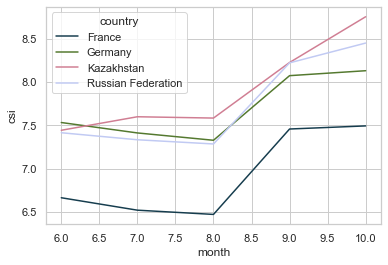

In [295]:
palette = sns.color_palette("cubehelix", 4)
sns.lineplot(data=csi, x="month", y='csi', hue="country", palette=palette)

**По графику можем сделать несколько выводов. Во-первых, после августа заметен значительный рост CSI во всех странах. Это совпадает с тем, что мы видели на динамике NPS. Однако, в CSI нет летней просадки, как это было у NPS.Кроме того видно, что Франция значительно отстает от других стран по уровню удовлетворенности, однако ее динамика в целом повторяет динамику других стран.**

**С CSI есть одна проблема - считать стат.значимости для него очень сложно, так как это составной индекс из огромного количества элементов (которые еще при этом взаимосвязанные). Поэтому сейчас мы пропустим этот этап и остановимся на визуализированной динамике.**

**Перейдем к продвинутому этапу. Как бизнес заказчикам, нам конечно круто понимать в какой месяц и где просели наши метрики удовлетворенности и лояльности. Однако, хотелось бы еще знать почему это произошло. Здесь мы можем пойти несколькими путями:**


**1. построить бинарную (логистическую) регрессию между факторами готовности рекомендации (переменные _aff) и принадлежностью к промоутерам - так узнаем, какие факторы по самоопределению респондентов повышают вероятность попадания респондента в промоутеры**

**2. построить линейную регрессию между оценкой NPS и оценкой удовлетворенности параметрами**

**Дополнительно еще данные позволяют нам проверить несколько гипотез. Например, кажется логичным если факторы важности будут положительно скоррелированы с соответствующими факторами удовлетворенности. Ведь это наши покупатели, поэтому если они покупают, это скорее всего значит, что мы выполняем их требования по важным для них параметрам**

**Еще проверим есть ли разницы между размером заказа и вероятностью попадания в промоутеры. Для этого будем использовать Хи Квадрат Пирсона. С этого и начнем.**

In [296]:
##добавим дамми переменные, которые будут показывать отношение к промоутерам или детракторам
dummies = pd.get_dummies(df['nps_cat'])
df['Promoter']=dummies['Promoter']
df['Detractor']=dummies['Detractor']
df.head()

,country,Usability_interface_imp,Search_convenience_imp,Product_range_imp,Product_quality_imp,Prices_imp,Customer_support_imp,Delivery_convenience_imp,Delivery_speed_imp,Delivery_cost_imp,Payment_range_options_imp,Return_refund_policies_imp,Usability_interface_sat,Search_convenience_sat,Product_range_sat,Product_quality_sat,Prices_sat,Customer_support_sat,Delivery_convenience_sat,Delivery_speed_sat,Delivery_cost_sat,Payment_range_options_sat,Return_refund_policies_sat,Tracking_sat,Pickup_sat,Packaging_sat,NPS,Usability_interface_aff,Search_convenience_aff,Product_range_aff,Product_quality_aff,Prices_aff,Customer_support_aff,Delivery_convenience_aff,Delivery_speed_aff,Delivery_cost_aff,Payment_range_options_aff,Return_refund_policies_aff,month,order_size_c,nps_cat,Promoter,Detractor
0,France,2,4,7,7,6,5,7,2,3,8,10,3,4,5,8,6,6,7,9,9,7,8,6,7,8,4,0,1,1,1,1,0,0,0,0,0,0,6,Big,Detractor,0,1
1,Russian Federation,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,5,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1,1,1,6,Medium,Promoter,1,0
2,Germany,8,8,8,9,9,8,8,8,8,8,8,8,8,7,2,7,6,5,2,5,6,4,5,5,6,7,1,0,0,0,0,0,0,0,0,0,0,6,Big,Neutral,0,0
3,Russian Federation,0,0,0,7,6,0,5,0,0,0,0,0,0,0,8,8,0,8,0,0,0,0,7,7,7,10,0,0,0,1,1,0,1,0,0,0,0,6,Small,Promoter,1,0
4,Russian Federation,10,10,10,10,10,10,10,10,10,10,10,10,5,5,3,5,0,10,3,0,10,0,5,5,5,8,0,0,0,1,1,0,0,0,0,0,0,6,Small,Neutral,0,0


In [297]:
##Для теста Хи-квадрат будем использовать scipy.stats.chi2_contingency (тест на независимость между двумя категор.переменными)
    ##Для этого нужно построить таблицу сопряжения и передать ее в функцию
chi=pd.crosstab(index=df['order_size_c'], columns=df['Promoter'])
chi

Promoter,0,1
order_size_c,,
Big,3279,5206
Extra,2615,3762
Medium,3752,6697
Small,2676,5502


In [298]:
from scipy.stats import chi2_contingency
chi2_contingency(chi)
#получаем значение статистики, p-value, степени свободы и ожидаемые значения. 

(122.99894402414887,
 1.7438061851948238e-26,
 3,
 array([[3121.98542805, 5363.01457195],
        [2346.36429872, 4030.63570128],
        [3844.62295082, 6604.37704918],
        [3009.0273224 , 5168.9726776 ]]))

**Получили p-value меньше 0.05. Значит мы отвергаем Н0 - есть зависимость между размером заказа и попаданием в промоутеры. Если мы сравним наблюдаемые значения и ожидаемые, то заметим, что в больших и экстра больших заказах промоутеров меньше чем ожидалось. В средних заказах значения близки, а в маленьких - наоборот, промоутеров больше чем ожидалось. Соответственно, делаем вывод, что с ростом размером заказа вероятность попадания клиента в промоутеры снижается. Если бы у нас были бы данные по GMV заказа, можно было бы построить регрессию и найти точку перегиба - с какой суммы заказа вероятность начинает снижаться.**

**Перейдем к поиску корреляций между факторами важности и удовлетворенности. Здесь я предлагаю пойти довольно простым, но объемным путем: просто скоррелируем все факторы друг на друга и отсортируем. Так мы 1). проверим вышеописанную гипотезу, 2). посмотрим сразу есть ли корреляция внутри факторов важности и 3). есть ли корреляция внутри факторов удовлетворенности.**

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33489 entries, 0 to 33488
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country                     33489 non-null  object
 1   Usability_interface_imp     33489 non-null  int64 
 2   Search_convenience_imp      33489 non-null  int64 
 3   Product_range_imp           33489 non-null  int64 
 4   Product_quality_imp         33489 non-null  int64 
 5   Prices_imp                  33489 non-null  int64 
 6   Customer_support_imp        33489 non-null  int64 
 7   Delivery_convenience_imp    33489 non-null  int64 
 8   Delivery_speed_imp          33489 non-null  int64 
 9   Delivery_cost_imp           33489 non-null  int64 
 10  Payment_range_options_imp   33489 non-null  int64 
 11  Return_refund_policies_imp  33489 non-null  int64 
 12  Usability_interface_sat     33489 non-null  int64 
 13  Search_convenience_sat      33489 non-null  in

In [300]:
corr = df.drop(['country', 'month', 'order_size_c', 
                         'nps_cat', 'NPS', 'Promoter', 'Detractor', 
                        'Usability_interface_aff','Search_convenience_aff', 'Product_range_aff', 'Product_quality_aff', 'Prices_aff', 'Customer_support_aff', 'Delivery_convenience_aff', 'Delivery_speed_aff', 'Delivery_cost_aff', 'Payment_range_options_aff', 'Return_refund_policies_aff']
                    , axis='columns') #убираем лишние переменные
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33489 entries, 0 to 33488
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Usability_interface_imp     33489 non-null  int64
 1   Search_convenience_imp      33489 non-null  int64
 2   Product_range_imp           33489 non-null  int64
 3   Product_quality_imp         33489 non-null  int64
 4   Prices_imp                  33489 non-null  int64
 5   Customer_support_imp        33489 non-null  int64
 6   Delivery_convenience_imp    33489 non-null  int64
 7   Delivery_speed_imp          33489 non-null  int64
 8   Delivery_cost_imp           33489 non-null  int64
 9   Payment_range_options_imp   33489 non-null  int64
 10  Return_refund_policies_imp  33489 non-null  int64
 11  Usability_interface_sat     33489 non-null  int64
 12  Search_convenience_sat      33489 non-null  int64
 13  Product_range_sat           33489 non-null  int64
 14  Produc

In [312]:
corr_res = corr.corr()
c1 = corr_res.unstack()
c1.sort_values(ascending = False)
c1 = c1[c1 != 1]

Usability_interface_imp     Search_convenience_imp        0.599068
                            Product_range_imp             0.549319
                            Product_quality_imp           0.420210
                            Prices_imp                    0.461909
                            Customer_support_imp          0.509380
                            Delivery_convenience_imp      0.518554
                            Delivery_speed_imp            0.313739
                            Delivery_cost_imp             0.492521
                            Payment_range_options_imp     0.536941
                            Return_refund_policies_imp    0.478616
                            Usability_interface_sat       0.490055
                            Search_convenience_sat        0.446973
                            Product_range_sat             0.426793
                            Product_quality_sat           0.346570
                            Prices_sat                    0.36

**Видим, что у нас есть очень много больших корреляций. Давайте посмотрим на только те, которые находятся в промежутке <1 и >0.6 и говорят нам о высокой силе корреляции.**

In [314]:
c_big = c1[c1 > 0.6]
c_big

Usability_interface_sat     Search_convenience_sat        0.646768
                            Product_range_sat             0.613101
                            Payment_range_options_sat     0.609047
Search_convenience_sat      Usability_interface_sat       0.646768
                            Product_range_sat             0.641688
Product_range_sat           Usability_interface_sat       0.613101
                            Search_convenience_sat        0.641688
Customer_support_sat        Return_refund_policies_sat    0.651090
Payment_range_options_sat   Usability_interface_sat       0.609047
Return_refund_policies_sat  Customer_support_sat          0.651090
dtype: float64

**Можно сделать вывод, что гипотеза о корреляции между факторами важности и удовлетворенности не подтвердилась. Однако, мы заметили, что есть сильные корреляции внутри факторов удовлетворенности, что объясняется с точки зрения бизнеса - например, UI и поиск - связанные с друг другом по смыслу факторы. Возврат осуществляется через поддержку - тоже видим высокую корреляции. Визуализируем это**

<AxesSubplot:>

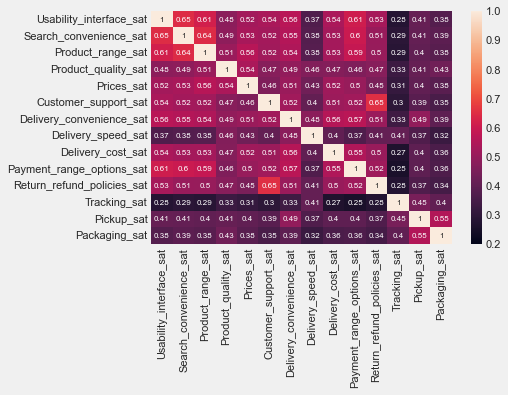

In [358]:
corr_sat= df.loc[:, 'Usability_interface_sat':'Packaging_sat']
sns.heatmap(corr_sat.corr(), annot = True, vmin=0.2, vmax=1, annot_kws={"size":8})

**Как раз на графике видны светлые области, которые мы описали выше**

**Теперь сделаем линейную регрессию для первой гипотезы: проверим влияние факторов удовлетворенности на NPS.**

In [337]:
##отберем данные
X = df.loc[:, 'Usability_interface_sat':'Packaging_sat']
y = df['NPS']

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101) ##делим выборку

In [344]:
model = LinearRegression() #модель
model.fit(X_train,y_train) #тренируем модель
predictions = model.predict(X_test) #предсказываем
print(
  'MSE : ', mean_squared_error(y_test, predictions))
print(
  'MAE : ', mean_absolute_error(y_test, predictions))
print(
  'R2 : ', r2_score(y_test, predictions))

MSE :  3.148199217261769
MAE :  1.2232101797949106
R2 :  0.38306819805800296


**Итак, получили метрики качества. В целом, показатель MAE удовлетворительный, однако R2 довольно низкий. Однако, для маркетинговых данных это удовлетворительный показатель. К сожалению, респонденты зачастую нерациональны в своих оценках, поэтому получить высокий R2 довольно сложно. Нам более интересны в данном случае веса переменных, так как так мы можем понять, что сильнее, а что менее сильно влияет на NPS.**

In [354]:
for i in range (len(list1)):
    print(list1[i], '=', model.coef_[i])

Usability_interface_sat = -0.017014503310987708
Search_convenience_sat = -0.009189179686226952
Product_range_sat = 0.015917164997285304
Product_quality_sat = 0.14470696828050958
Prices_sat = 0.03331061580255444
Customer_support_sat = 0.047252640475265596
Delivery_convenience_sat = 0.0123651148338189
Delivery_speed_sat = 0.051556277404804576
Delivery_cost_sat = -0.020019632853381458
Payment_range_options_sat = -0.05562979742742671
Return_refund_policies_sat = 0.034671123075884124
Tracking_sat = 0.11470015380568843
Pickup_sat = 0.17464632197944452
Packaging_sat = 0.0961952470320519


**Получили, что на NPS больше всего влияет Product quality, Pick up, Tracking. Остальные коэффициенты довольно низкие. Это бьется с реальными результатами исследования внутри компании - анализ в SPSS показал подобные результаты, выделив эти три фактора как реально влияющие на NPS. Это также объясняется с точки зрения потребительского поведения - эти факторы наиболее свежи в памяти покупателя на момент прохождения опроса**

**Теперь построим логистическую регрессию - между факторами готовности рекомендации (переменные _aff) и принадлежностью к промоутерам - так узнаем, какие факторы по самоопределению респондентов повышают вероятность попадания респондента в промоутеры**

In [355]:
##отберем данные
X = df.loc[:, 'Usability_interface_aff':'Return_refund_policies_aff']
y = df['Promoter']

In [385]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
Log_reg_model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101) ##делим выборку
Log_reg_model.fit(X_train, y_train) #учим модель
y_pred = Log_reg_model.predict(X_test)
y_pred_probs = Log_reg_model.predict_proba(X_test)

In [361]:
y_pred_probs #посмотрим на вероятности отношения к промоутерам

array([[0.39132343, 0.60867657],
       [0.63471559, 0.36528441],
       [0.11129646, 0.88870354],
       ...,
       [0.62316586, 0.37683414],
       [0.27882641, 0.72117359],
       [0.45125239, 0.54874761]])

In [383]:
import numpy as np
coef = pd.DataFrame({'Coefs' : Log_reg_model.coef_[0],
                    'Names' : list_aff})
coef = coef.append({'Coefs' : Log_reg_model.intercept_[0],
                   'Names' : 'intercept'}, ignore_index = True)
coef['Odds coef'] = np.exp(coef['Coefs'])
coef

C:\Users\gladyshkevich_joom\AppData\Local\Temp\ipykernel_19768\2971993427.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef = coef.append({'Coefs' : Log_reg_model.intercept_[0],


,Coefs,Names,Odds coef
0,0.251376,Usability_interface_aff,1.285793
1,0.280332,Search_convenience_aff,1.323570
2,0.567427,Product_range_aff,1.763722
3,0.743489,Product_quality_aff,2.103261
4,0.636033,Prices_aff,1.888972
5,0.256957,Customer_support_aff,1.292990
6,0.385787,Delivery_convenience_aff,1.470772
7,0.167637,Delivery_speed_aff,1.182508
8,0.174593,Delivery_cost_aff,1.190761
9,0.056456,Payment_range_options_aff,1.058080


**Видим, что сильнее всего влияют на попадание в промоутеры цены, качество продукта и ассортимент. Если юзер отметил, что эти факторы повлияли на его рекомендацию, то вероятность попадания в промоутеры - выше. Посмотрим на качество модели.**

In [370]:
from sklearn.metrics import accuracy_score, f1_score,\
recall_score, confusion_matrix, plot_roc_curve

C:\Users\gladyshkevich_joom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


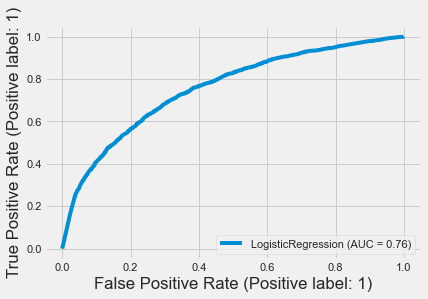

In [384]:
plot_roc_curve(Log_reg_model, X_test, y_test)


In [374]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1835 1856]
 [1080 5276]]


In [382]:
accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Accuracy : 0.7078729969145019
F1_score:  0.7823830355156817
Recall:  0.830081812460667
Precision:  0.73986818118076
